In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer 
import rcc
# Enable inline plotting
pd.options.display.max_rows=10
%matplotlib inline

In [3]:
#read files from MovieLens dataset
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')
links = pd.read_csv('links.csv')
movies.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
userId       100836 non-null int64
movieId      100836 non-null int64
rating       100836 non-null float64
timestamp    100836 non-null int64
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [7]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [8]:
# Merge files by same movie ID and user ID 
merge1 = pd.merge(ratings,tags, on=['userId','movieId'],how ='left')
merged = pd.merge(merge1,movies,on=['movieId'],how='left')
merged

,userId,movieId,rating,timestamp_x,tag,timestamp_y,title,genres
0,1,1,4.0,964982703,NaN,NaN,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,NaN,NaN,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,NaN,NaN,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,NaN,NaN,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,NaN,NaN,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...,...,...
102672,610,166534,4.0,1493848402,NaN,NaN,Split (2017),Drama|Horror|Thriller
102673,610,168248,5.0,1493850091,Heroic Bloodshed,1.493844e+09,John Wick: Chapter Two (2017),Action|Crime|Thriller
102674,610,168250,5.0,1494273047,NaN,NaN,Get Out (2017),Horror
102675,610,168252,5.0,1493846352,NaN,NaN,Logan (2017),Action|Sci-Fi


In [9]:
# get a unique list of genre

# combine all the genre in one list
genring = merged['genres'].str.split('|')
all_genres=[]
for alltypes in range(len(genring)):
    all_genres.append(genring[alltypes])

# turn the nested list in a list that contains all the elements
from itertools import chain
all_genres = list(chain.from_iterable(all_genres))
uniq_genre = np.unique(np.array(all_genres))
uniq_genre

array(['(no genres listed)', 'Action', 'Adventure', 'Animation',
       'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'], dtype='<U18')

In [10]:
# get how many movies in each genre
kw_count = dict()
for s in uniq_genre: kw_count[s]=0
for g in all_genres: 
    kw_count[g] += 1
kw_count

{'(no genres listed)': 49,
 'Action': 31151,
 'Adventure': 24497,
 'Animation': 7119,
 'Children': 9285,
 'Comedy': 39622,
 'Crime': 17224,
 'Documentary': 1259,
 'Drama': 43024,
 'Fantasy': 11989,
 'Film-Noir': 880,
 'Horror': 7408,
 'IMAX': 4258,
 'Musical': 4170,
 'Mystery': 7906,
 'Romance': 18353,
 'Sci-Fi': 17691,
 'Thriller': 27175,
 'War': 4931,
 'Western': 1966}

In [11]:
kw_count = pd.DataFrame.from_dict(kw_count, orient = 'index', columns = ['number of movie'])
kw_count = kw_count.sort_values(by = ['number of movie'])
kw_count.index.names=['genre']
kw_count

,number of movie
genre,
(no genres listed),49
Film-Noir,880
Documentary,1259
Western,1966
Musical,4170
...,...
Adventure,24497
Thriller,27175
Action,31151


In [12]:
kw_count.index

Index(['(no genres listed)', 'Film-Noir', 'Documentary', 'Western', 'Musical',
       'IMAX', 'War', 'Animation', 'Horror', 'Mystery', 'Children', 'Fantasy',
       'Crime', 'Sci-Fi', 'Romance', 'Adventure', 'Thriller', 'Action',
       'Comedy', 'Drama'],
      dtype='object', name='genre')

In [13]:
import plotly
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='Florajiang', api_key='aREKoI0rcSmIKwNfDoR5')
data = [go.Bar(x=kw_count.index,y=kw_count['number of movie'])]
plotly.plotly.iplot(data, filename='Popularity of Genres')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~Florajiang/0 or inside your plot.ly account where it is named 'Popularity of Genres'


In [14]:
# create dummy variables in term of genres
temp = merged.copy()
temp = pd.concat([temp, temp.genres.str.get_dummies(sep='|')],axis =1)
temp 

,userId,movieId,rating,timestamp_x,tag,timestamp_y,title,genres,(no genres listed),Action,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,4.0,964982703,NaN,NaN,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,3,4.0,964981247,NaN,NaN,Grumpier Old Men (1995),Comedy|Romance,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,6,4.0,964982224,NaN,NaN,Heat (1995),Action|Crime|Thriller,0,1,...,0,0,0,0,0,0,0,1,0,0
3,1,47,5.0,964983815,NaN,NaN,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,50,5.0,964982931,NaN,NaN,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102672,610,166534,4.0,1493848402,NaN,NaN,Split (2017),Drama|Horror|Thriller,0,0,...,0,1,0,0,0,0,0,1,0,0
102673,610,168248,5.0,1493850091,Heroic Bloodshed,1.493844e+09,John Wick: Chapter Two (2017),Action|Crime|Thriller,0,1,...,0,0,0,0,0,0,0,1,0,0
102674,610,168250,5.0,1494273047,NaN,NaN,Get Out (2017),Horror,0,0,...,0,1,0,0,0,0,0,0,0,0
102675,610,168252,5.0,1493846352,NaN,NaN,Logan (2017),Action|Sci-Fi,0,1,...,0,0,0,0,0,0,1,0,0,0


In [15]:
temp['tag'] = temp.tag.fillna('')
temp.tag.head()

0    
1    
2    
3    
4    
Name: tag, dtype: object

In [16]:
# vectorize the features, feature vctor the tags
vectorizer = TfidfVectorizer(stop_words='english')
X=vectorizer.fit_transform(temp['tag'])
features = pd.DataFrame(X.toarray(),columns = vectorizer.get_feature_names())
features.head()

,06,1900s,1920s,1950s,1960s,1970s,1980s,1990s,2001,250,...,wrongful,wry,york,younger,zellweger,zither,zoe,zombie,zombies,zooey
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
temp = temp.drop(columns=['tag','timestamp_y','genres','title'])
temp.head()

,userId,movieId,rating,timestamp_x,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,4.0,964982703,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,3,4.0,964981247,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,1,6,4.0,964982224,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,47,5.0,964983815,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,50,5.0,964982931,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [18]:
featured = pd.concat([temp, features], axis=1)
featured.head()

,userId,movieId,rating,timestamp_x,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,wrongful,wry,york,younger,zellweger,zither,zoe,zombie,zombies,zooey
0,1,1,4.0,964982703,0,0,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,3,4.0,964981247,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,6,4.0,964982224,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,47,5.0,964983815,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,50,5.0,964982931,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# done with data processing 
# run Kmeans 
from sklearn.cluster import KMeans
# init kmeans 
kmeans = KMeans(n_clusters = 10)
# fitting the inputs 
kmeans = kmeans.fit(featured)


In [20]:
# predict the clusters 
labels = kmeans.predict(featured)

In [22]:
# get the cluster center 
C = kmeans.cluster_centers_
C

array([[ 3.06522235e+02,  1.90555301e+03,  3.47235263e+00, ...,
         3.89973969e-18,  6.52060511e-05,  1.95071688e-18],
       [ 2.85712133e+02,  4.27297295e+04,  3.61080672e+00, ...,
         1.01954694e-04,  7.20928556e-05,  1.84822589e-18],
       [ 3.41713979e+02,  1.02329584e+04,  3.37244374e+00, ...,
         3.05778894e-18, -1.57141552e-17,  1.52974150e-18],
       ...,
       [ 3.36808837e+02,  2.60882033e+04,  3.67647837e+00, ...,
         1.89227160e-18, -1.11062960e-17,  9.46982835e-19],
       [ 3.34760460e+02,  4.51911485e+03,  3.46996686e+00, ...,
         2.75285708e-18,  3.10687655e-04,  1.37727557e-18],
       [ 3.14026440e+02,  1.58275890e+04,  3.54957507e+00, ...,
         1.81434457e-18, -1.08013641e-17,  9.08019319e-19]])

In [27]:
# to print the clusters
clustersvdf=kmeans.fit_predict(featured)
#print clusters.shape
cluster_0=np.where(clustersvdf==0)
print(cluster_0)

(array([   880,    881,    882, ..., 101308, 101309, 101313]),)


In [28]:
abc = list(cluster_0)[0]
abc

array([   880,    881,    882, ..., 101308, 101309, 101313])

In [29]:
merged.iloc[abc]

,userId,movieId,rating,timestamp_x,tag,timestamp_y,title,genres
880,7,1,4.5,1106635946,NaN,NaN,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
881,7,50,4.5,1106635993,NaN,NaN,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
882,7,58,3.0,1106635520,NaN,NaN,"Postman, The (Postino, Il) (1994)",Comedy|Drama|Romance
883,7,150,4.5,1106635925,NaN,NaN,Apollo 13 (1995),Adventure|Drama|IMAX
884,7,165,4.0,1106635987,NaN,NaN,Die Hard: With a Vengeance (1995),Action|Crime|Thriller
...,...,...,...,...,...,...,...,...
101306,608,30810,3.0,1117408029,NaN,NaN,"Life Aquatic with Steve Zissou, The (2004)",Adventure|Comedy|Fantasy
101307,608,30822,4.0,1117408717,NaN,NaN,In Good Company (2004),Comedy|Drama
101308,608,31221,4.0,1117504121,NaN,NaN,Elektra (2005),Action|Adventure|Crime|Drama
101309,608,31696,5.0,1117336799,NaN,NaN,Constantine (2005),Action|Fantasy|Horror|Thriller


In [30]:
#top 50 movies
merged.iloc[abc]['title'].unique()[:50]

array(['Toy Story (1995)', 'Usual Suspects, The (1995)',
       'Postman, The (Postino, Il) (1994)', 'Apollo 13 (1995)',
       'Die Hard: With a Vengeance (1995)',
       'Star Wars: Episode IV - A New Hope (1977)', 'Forrest Gump (1994)',
       'True Lies (1994)', 'Hot Shots! Part Deux (1993)',
       'Jurassic Park (1993)', 'Ghost (1990)', 'Aladdin (1992)',
       'Terminator 2: Judgment Day (1991)', 'Batman (1989)',
       'Silence of the Lambs, The (1991)', 'Beauty and the Beast (1991)',
       'Mission: Impossible (1996)',
       'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)',
       'Independence Day (a.k.a. ID4) (1996)',
       'Gone with the Wind (1939)', '2001: A Space Odyssey (1968)',
       'Top Gun (1986)', 'English Patient, The (1996)',
       'Star Wars: Episode V - The Empire Strikes Back (1980)',
       'Apocalypse Now (1979)',
       'Star Wars: Episode VI - Return of the Jedi (1983)',
       'Psycho (1960)', 'Blues Brothers, The (1980)'

In [31]:
featured = featured.drop(columns='timestamp_x')
featured.head()

,userId,movieId,rating,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,wrongful,wry,york,younger,zellweger,zither,zoe,zombie,zombies,zooey
0,1,1,4.0,0,0,1,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,3,4.0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,6,4.0,0,1,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,47,5.0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,50,5.0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
kmeans2 =KMeans(n_clusters=20)
kmeans2 = kmeans.fit(featured)
labels2=kmeans2.predict(featured)


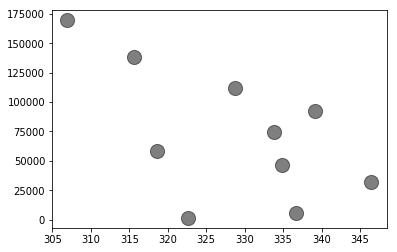

In [33]:
centers = kmeans2.cluster_centers_
plt.scatter(centers[:,0], centers[:,1],c='black',s=200,alpha=0.5)

In [34]:
clustersTemp =kmeans2.fit_predict(featured)
cluster_02 =np.where(clustersTemp==0)
print(cluster_02)

(array([     0,      1,      2, ..., 101568, 101569, 101570]),)


In [35]:
# top 10 movies
merged.iloc[list(cluster_02)[0]]['title'].unique()[:10]

array(['Toy Story (1995)', 'Grumpier Old Men (1995)', 'Heat (1995)',
       'Seven (a.k.a. Se7en) (1995)', 'Usual Suspects, The (1995)',
       'From Dusk Till Dawn (1996)', 'Bottle Rocket (1996)',
       'Braveheart (1995)', 'Rob Roy (1995)', 'Canadian Bacon (1995)'],
      dtype=object)

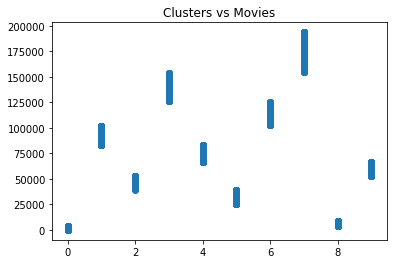

In [36]:
plt.title("Clusters vs Movies")
plt.scatter(clustersTemp,merged['movieId'])

In [19]:
import rcc
from sklearn.metrics import adjusted_mutual_info_score

X = []
Y = []

copyftd = featured.copy()
X = copyftd.values


In [20]:
# make the data compute friendly
from scipy import sparse
sp_x=sparse.coo_matrix(X)
X = sp_x.toarray()


In [21]:
clusterer = rcc.RccCluster(measure='cosine')

In [22]:
P = clusterer.fit(X)

mu = 1.4892062642798592e+18, lambda = 24980505184.336933, epsilon = 1.5657219886779785, delta = 1.2906244993209839
 Iter | Data 	 | Smooth 	 | Obj 	
 1 | 0.0 | 8.986710517578435e+31 | 8.986710517578435e+31
 2 | 1.3892453504991387e+21 | 9.801399277302955e+22 | 9.940323812352868e+22
 3 | 1.389245388137417e+21 | 9.801399273387478e+22 | 9.940323812201219e+22
 4 | 1.389245388137417e+21 | 9.801399273387478e+22 | 9.940323812201219e+22
 5 | 1.389245388137417e+21 | 4.900699667133825e+22 | 5.0396242059475666e+22
 6 | 1.3892453881393308e+21 | 4.900699667134085e+22 | 5.039624205948018e+22
 7 | 1.3892453881393308e+21 | 4.900699667134085e+22 | 5.039624205948018e+22
 8 | 1.3892453881393308e+21 | 2.4503498640072175e+22 | 2.5892744028211506e+22
 9 | 1.3892453881329583e+21 | 2.4503498640075518e+22 | 2.5892744028208478e+22
 10 | 1.3892453881329583e+21 | 2.4503498640075518e+22 | 2.5892744028208478e+22
 11 | 1.3892453881329583e+21 | 1.2251749624441123e+22 | 1.364099501257408e+22
 12 | 1.3892453882306143e+2

In [26]:
cluster_01 = np.where(P==1)
rcm = list(cluster_01)[0]

In [27]:
#top 50 movie in this cluster 
merged.iloc[rcm]['title'].unique()[:50]


array(['Grumpier Old Men (1995)', 'Heat (1995)',
       'Usual Suspects, The (1995)', 'From Dusk Till Dawn (1996)',
       'Braveheart (1995)', 'Dangerous Minds (1995)', 'Get Shorty (1995)',
       'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)', 'To Die For (1995)',
       'Seven (a.k.a. Se7en) (1995)', 'Mighty Aphrodite (1995)',
       'Postman, The (Postino, Il) (1994)',
       'Nobody Loves Me (Keiner liebt mich) (1994)',
       'Flirting With Disaster (1996)',
       'NeverEnding Story III, The (1994)', 'Toy Story (1995)',
       'Babe (1995)', 'Dead Man Walking (1995)', 'Clueless (1995)',
       'Jumanji (1995)', 'Waiting to Exhale (1995)',
       'Father of the Bride Part II (1995)', 'Sabrina (1995)',
       'Tom and Huck (1995)', 'American President, The (1995)',
       'Balto (1995)', 'Casino (1995)', 'Sense and Sensibility (1995)',
       'Ace Ventura: When Nature Calls (1995)', 'Copycat (1995)',
       'Powder (1995)', 'Leaving Las Vegas (1995)', 'Othello (1995)',
       'Now an

In [146]:
"""
ClusterLabels =     P[-1]
def which_cluster_inkms(moviename):
    if merged['title'].str.contains(moviename,regex=False).any():
        for x in range(ClusterLabels):
            if merged.iloc[list(P==x)[0]]['title'].str.contains('Heat (1995)', regex=False).any(): return x
    else: print('item not found.')
"""

In [23]:
"""import re
merged['title'].str.contains('Heat (1995)', regex=False).any()
merged.iloc[list(np.where(P==1))[0]]['title'].str.contains('Heat (1995)', regex=False).any()
#which_cluster_inkms('Screamers (1995)')"""

True